# Look at the TGAS x Wright x 2MASS catalog of stars (TGAS closer than 125 pc)

This is looking at the vot that resulted from the XMatch of the TGAs 125 pc catalog and the Wright et al catalog of spectral info for TGAS stars and 2MASS. The match was done by Visizer XMatch service. There are 28815 source in the cross-matched catalog

Importing some modules (libraries) and giving them short names such as **np** and **plt**. You will find that most users will use these common ones.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Now lets use astropy table reader... because it is easier..

A file with the extension .vot is an virtual observatory table type. astropy knows this format: votable. Lets read the file into a structure "t". Nice work astropy people!

In [3]:
from astropy.table import Table
t = Table.read('TgasxWrightx2mass.vot', format='votable')

print(t)



      d_arcsec            d_arcsec_2      ...  X      MeasureJD     
        arcs                 arcs         ...             d         
-------------------- -------------------- ... --- ------------------
 0.60932799999999998  0.58564499999999997 ...   0 2451477.8113000002
  2.7272609999999999   2.8163619999999998 ...   0 2451575.8741000001
  1.8428100000000001  0.29380600000000001 ...   0 2451142.9920000001
 0.72121599999999997  0.19058800000000001 ...   0 2451682.7418999998
            1.041955  0.98780500000000004 ...   0 2451355.7990000001
 0.50914599999999999  0.52508500000000002 ...   0 2451477.8154000002
  1.1693359999999999  0.94533400000000001 ...   0 2450838.7818999998
  2.7509899999999998             2.801396 ...   0 2451575.8741000001
 0.92219399999999996  0.86115600000000003 ...   0       2450971.8325
            2.453678   2.1731660000000002 ...   0 2451110.8056999999
                 ...                  ... ... ...                ...
 0.52314099999999997  0.1926460000

## Access to values within the table...

Astropy reads both the header information and the ascii column information. The data in the columns of the table go into the structure with labels corresponding to the column header title... for example

In [9]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['d_arcsec', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Mag', 'Teff', 'SpType', '_2MASS', 'RAJ2000_2', 'DEJ2000_2', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


## so you can access, for example, the parallax, or phot_g_mean_mag

In [10]:
print(t["Source","d_arcsec","__Gmag_","Kmag","Qfl"])

       Source             d_arcsec        __Gmag_     Kmag   Qfl
                            arcs            mag       mag       
------------------- -------------------- --------- --------- ---
4655830482578137344  0.60932799999999998 9.2159996 7.8379998 AAA
3487237020257152640   2.7272609999999999 9.6499996 8.1759996 AAA
 627906248532034688   1.8428100000000001 9.0050001 7.5370002 AAA
1399531345558458880  0.72121599999999997 8.0950003 6.9330001 AAA
6882602216151398784             1.041955 9.8540001 8.5360003 AAA
4655833952911711488  0.50914599999999999 9.5389996 8.4499998 AAA
 627954523964445952   1.1693359999999999     7.743 6.5339999 AAA
3487243033211366656   2.7509899999999998 8.6350002     7.494 AAA
6882818304546426752  0.92219399999999996 7.8629999 6.9289999 AAA
4655882675012240128             2.453678 7.6570001 6.2839999 AAA
                ...                  ...       ...       ... ...
4889439904192305536  0.52314099999999997    10.151 8.8199997 AAA
5713669142188255232  0.81

## Make some interesting plots

histograms of magnitudes in G, J and K, Color-Color diagrams

Kmag count before mask:  28794
Kmag masked count:  28794


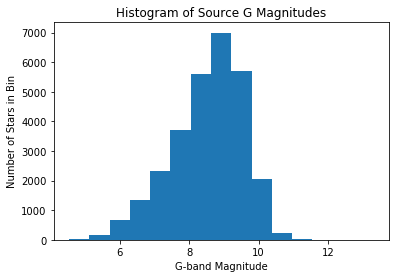

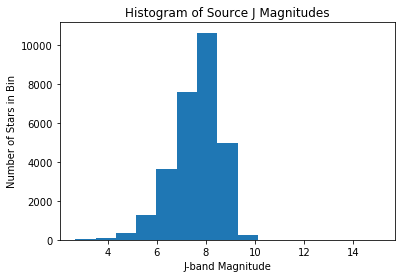

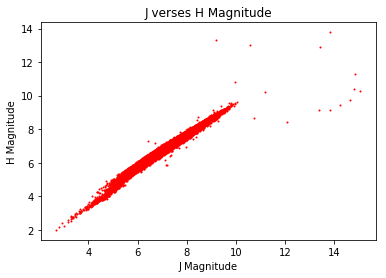

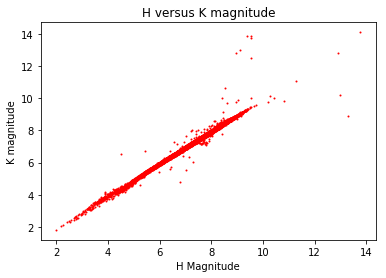

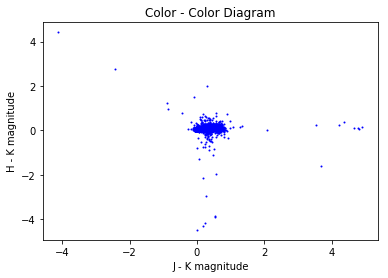

In [11]:
import numpy.ma as ma
gmags = t["__Gmag_"]
vmags = t["VTmag"]
bmags = t["BTmag"]
jmags = t["Jmag"]
hmags = t["Hmag"]
kmags = t["Kmag"]
m_min = 0
m_max = 16
kmagmask = ma.masked_outside(kmags,m_min,m_max)
print('Kmag count before mask: ',kmags.count())
print('Kmag masked count: ',kmagmask.count())
bins = 15
plt.xlabel('G-band Magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram of Source G Magnitudes')
plt.hist(gmags,bins)
plt.show()

plt.xlabel('J-band Magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram of Source J Magnitudes')
plt.hist(jmags,bins)
plt.show()

plt.xlabel('J Magnitude')
plt.ylabel('H Magnitude')
plt.title('J verses H Magnitude')
plt.scatter(jmags,hmags,s=1.0,c='r')
plt.show()

plt.xlabel('H Magnitude')
plt.ylabel('K magnitude')
plt.title('H versus K magnitude')
plt.scatter(hmags,kmags,s=1.0,c='r')
plt.show()

JminusH = jmags - hmags
HminusK = hmags - kmags
plt.xlabel('J - K magnitude')
plt.ylabel('H - K magnitude')
plt.title('Color - Color Diagram')
plt.scatter(JminusH,HminusK,s=1.0,c='b')
plt.show()



From the above plots, it looks like there is a poor correlation between J, H, and K when they are greater than 10th magnitude. There are also some brighter that deviate significantly from the standard relationship by more them might be expected from errors.


## Now lets try some plots where we cutout some of the data.
For example, if we cut out all points with J, H, or K mags larger than 10, does that get rid of most of the deviant points in the color-color diagram?

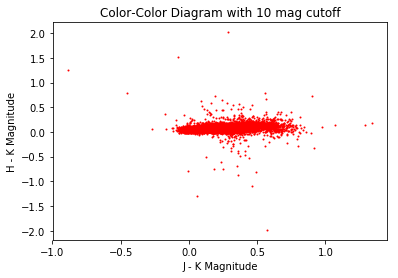

In [12]:
Jmag10 = ma.masked_outside(jmags,2,10.0)
Hmag10 = ma.masked_outside(hmags,2,10.0)
Kmag10 = ma.masked_outside(kmags,2,10.0)
JH10 = Jmag10 - Hmag10
HK10 = Hmag10 - Kmag10
plt.xlabel('J - K Magnitude')
plt.ylabel('H - K Magnitude')
plt.title('Color-Color Diagram with 10 mag cutoff')
plt.scatter(JH10,HK10,s=1.0,c='r')
plt.show()

That got rid of the worst points. I wonder what the range is of G-B and G-J colors.... By doing "colors" you automatically take out the distance.... In the plots below, I masked out the stars with Teff >9500 in order to get a reasonable range of colors over the Teff range containing most of the stars: 3500-9500.

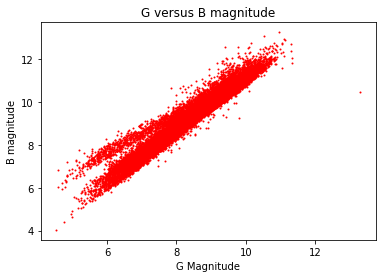

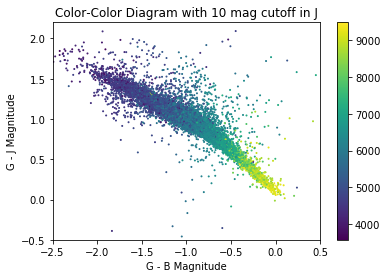

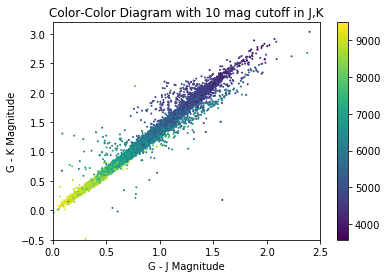

In [29]:
plt.xlabel('G Magnitude')
plt.ylabel('B magnitude')
plt.title('G versus B magnitude')
plt.scatter(gmags,bmags,s=1.0,c='r')
plt.show()

GB10 = gmags - bmags
GJ10 = gmags - jmags
GK10 = gmags - kmags
Teff = t['Teff']
TeffMask = ma.masked_outside(Teff,3500.,9500.)
GB10Mask = ma.array(GB10,mask=TeffMask.mask)
GJ10Mask = ma.array(GJ10,mask=TeffMask.mask)
GK10Mask = ma.array(GK10,mask=TeffMask.mask)
plt.xlim(-2.5,0.5)
plt.ylim(-0.5,2.2)
plt.xlabel('G - B Magnitude')
plt.ylabel('G - J Magnitude')
plt.title('Color-Color Diagram with 10 mag cutoff in J')
plt.scatter(GB10Mask,GJ10Mask,s=1.0,c=Teff)
plt.colorbar()
plt.show()

plt.xlim(0,2.5)
plt.ylim(-0.5,3.2)
plt.xlabel('G - J Magnitude')
plt.ylabel('G - K Magnitude')
plt.title('Color-Color Diagram with 10 mag cutoff in J,K')
plt.scatter(GJ10Mask,GK10Mask,s=1.0,c=Teff)
plt.colorbar()
plt.show()

Both of the color-color diagrams show nice correlations, and the different Teff stars are separated along the correlation. This is encouraging. One can see that it is possible that different Teff stars will have sufficient different colors that one will be able to distinguish between Teff 4000, 5000, 6000, etc. Now remains the hard work of refining the SED for each Teff bin and estimating how well Teff can be determined from SEDs.

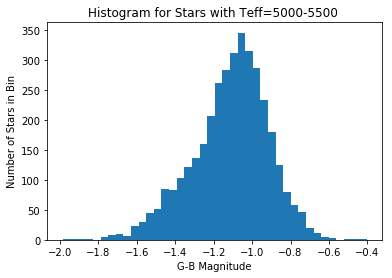

Mean G-B =  -1.11193
Standard Deviation =  0.198276


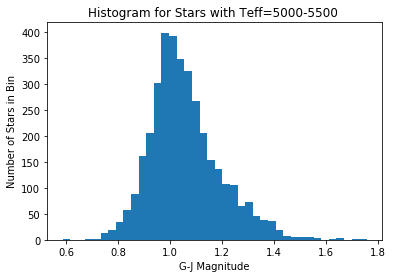

Mean G-J =  1.05681
Standard Deviation =  0.135933


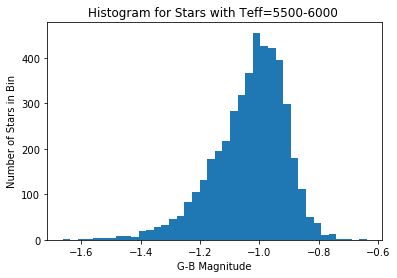

Mean G-B =  -1.03387
Standard Deviation =  0.123021


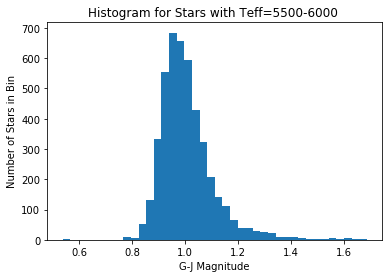

Mean G-J =  1.00718
Standard Deviation =  0.102592


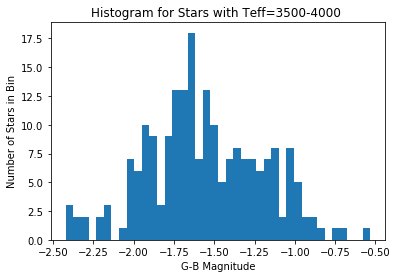

Mean G-B =  -1.55837
Standard Deviation =  0.357699


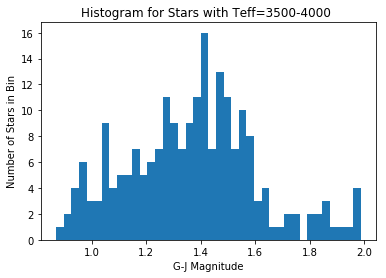

Mean G-J =  1.36853
Standard Deviation =  0.240015


In [59]:
Teff5250 = ma.masked_outside(Teff,5000,5500)
GB5250 = ma.array(GB10,mask=Teff5250.mask)
GB5250Mask = ma.compressed(ma.masked_outside(GB5250,-2.0,-0.2))
bins = 40
plt.xlabel('G-B Magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram for Stars with Teff=5000-5500 ')
plt.hist(GB5250Mask,bins)
plt.show()
print('Mean G-B = ', GB5250Mask.mean())
print('Standard Deviation = ', np.std(GB5250Mask))

GJ5250 = ma.array(GJ10,mask=Teff5250.mask)
GJ5250Mask = ma.compressed(ma.masked_outside(GJ5250,0.5,1.8))
bins = 40
plt.xlabel('G-J Magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram for Stars with Teff=5000-5500 ')
plt.hist(GJ5250Mask,bins)
plt.show()
print('Mean G-J = ', GJ5250Mask.mean())
print('Standard Deviation = ', np.std(GJ5250Mask))

Teff5750 = ma.masked_outside(Teff,5500,6000)
GB5750 = ma.array(GB10,mask=Teff5750.mask)
GB5750Mask = ma.compressed(ma.masked_outside(GB5750,-1.7,-0.5))
bins = 40
plt.xlabel('G-B Magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram for Stars with Teff=5500-6000 ')
plt.hist(GB5750Mask,bins)
plt.show()
print('Mean G-B = ', GB5750Mask.mean())
print('Standard Deviation = ', np.std(GB5750Mask))

GJ5750 = ma.array(GJ10,mask=Teff5750.mask)
GJ5750Mask = ma.compressed(ma.masked_outside(GJ5750,0.5,1.75))

plt.xlabel('G-J Magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram for Stars with Teff=5500-6000 ')
plt.hist(GJ5750Mask,bins)
plt.show()
print('Mean G-J = ', GJ5750Mask.mean())
print('Standard Deviation = ', np.std(GJ5750Mask))

Teff3750 = ma.masked_outside(Teff,3500,4000)
GB3750 = ma.array(GB10,mask=Teff3750.mask)
GB3750Mask = ma.compressed(ma.masked_outside(GB3750,-2.5,-0.5))
bins = 40
plt.xlabel('G-B Magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram for Stars with Teff=3500-4000 ')
plt.hist(GB3750Mask,bins)
plt.show()
print('Mean G-B = ', GB3750Mask.mean())
print('Standard Deviation = ', np.std(GB3750Mask))

GJ3750 = ma.array(GJ10,mask=Teff3750.mask)
GJ3750Mask = ma.compressed(ma.masked_outside(GJ3750,0.0,2))

plt.xlabel('G-J Magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram for Stars with Teff=3500-4000 ')
plt.hist(GJ3750Mask,bins)
plt.show()
print('Mean G-J = ', GJ3750Mask.mean())
print('Standard Deviation = ', np.std(GJ3750Mask))